In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
nltk.download("stopwords")
nltk.download('punkt')

from nltk.corpus import stopwords

from string import punctuation

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
additional_stop_words = []
stop_words += additional_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from tqdm import tqdm
import seaborn as sns

In [ ]:
!pip install pymystem3==0.1.10

In [ ]:
from pymystem3 import Mystem
m = Mystem()

In [ ]:
m.lemmatize('Мама мыла раму')

['мама', ' ', 'мыть', ' ', 'рама', '\n']

In [ ]:
russian_stopwords = stopwords.words("russian")

additional_stopwords = ['здравствуйте', 'добрый', 'день']
russian_stopwords = russian_stopwords + additional_stopwords

stop_words = russian_stopwords
stop_words = stopwords.words('russian')
stop_words += additional_stop_words

#Preprocess function
def preprocess_text(text):
    tokens = m.lemmatize(text)
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [ ]:

def get_clean_texts(array):
  return [preprocess_text(x) for x in array]

def get_top_n_words(array, ngram=1, n=20):
    corpus = get_clean_texts(array)
    vec = CountVectorizer(stop_words=stop_words, ngram_range=[ngram, ngram])
    vec = vec.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
df = pd.read_excel('report-2.xlsx')
df = df.drop_duplicates()

In [ ]:
df.head()

,ID отзыва,Дата,Артикул,Номенклатура,Количество звезд,Бренд,Текст отзыва,Имя,Регион,Цвет,Размер,Полезность (количество минусов),Полезность (количество плюсов)
0,HyJJv3YBFIOpk54q08Kz,1/1/2021,RS031/Синий,13271371,5,RuscoSport,"Очень хорошая груша и качественная, ребёнок оц...",Наталья,RU,синий,4,0,0
1,iT8-v3YBiRPpoNnbx1Dv,1/1/2021,62015BW,13802046,5,Bestway,"Отличные весла, брал для детской лодки.",Алексей,RU,"желтый, черный",0,0,0
2,QD-2vnYBiRPpoNnbdz1j,1/1/2021,RS_RUKOPERCH/Черный,14572687,5,RuscoSport,"На 12 лет подошли отлично, сыну нравятся",Ирина,RU,черный,8 унций,0,0
3,UHuhvnYB5lUbj988ATqj,1/1/2021,BB_001/Белый,12830015,5,BoyBo,Все отлично,Кирилл,RU,белый,XL,0,0
4,QaBSvnYBvSOtYVZXyrFd,1/1/2021,BB_FIGHTBALL,13303449,5,BoyBo,"Вещь хорошая, регулировка есть, для начального...",Максим,RU,"черный, зеленый",0,0,0


In [ ]:
df.shape

(1763, 13)

In [ ]:
feedbacks = df['Текст отзыва']
feedbacks_proc = []
for feedback in tqdm(feedbacks):
    feedbacks_proc.append(preprocess_text(feedback))

100%|██████████| 1763/1763 [00:01<00:00, 1203.62it/s]


In [ ]:
print(feedbacks[0])
print(feedbacks_proc[0])

Очень хорошая груша и качественная, ребёнок оценил.
очень хороший груша качественный ребенок оценивать


In [ ]:
vectorizer = TfidfVectorizer(max_df=1000, min_df=50)
matrix = vectorizer.fit_transform(feedbacks_proc)

In [ ]:
matrix.shape

(1763, 40)

In [ ]:
results = {
  'accuracy': [],
  'precision': [],
  'recall': [],
  'f1': [],
}
for n in range(2, 20):
  print('Clusters:', n)
  n_clusters = n
  model = KMeans(n_clusters=n_clusters, random_state=1)
  preds = model.fit_predict(matrix.toarray())
  preds

  X = matrix.toarray()
  Y = preds.copy()

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
  model = LogisticRegression()
  model.fit(X_train, y_train)

  y_pred = pd.Series(model.predict(X_test))
  y_test = pd.Series(y_test)

  results['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
  results['precision'].append(metrics.precision_score(y_test, y_pred, average='macro'))
  results['recall'].append(metrics.recall_score(y_test, y_pred, average='macro'))
  results['f1'].append(metrics.f1_score(y_test, y_pred, average='macro'))

  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
  print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
  print("F1 Score:", metrics.f1_score(y_test, y_pred, average='macro'))
  print('--'*10)



Clusters: 2
Accuracy: 0.9886578449905482
Precision: 0.9932432432432432
Recall: 0.967032967032967
F1 Score: 0.9795531849103278
--------------------
Clusters: 3
Accuracy: 0.9810964083175804
Precision: 0.9916036943744753
Recall: 0.9505398815743643
F1 Score: 0.970013350507856
--------------------
Clusters: 4
Accuracy: 0.9848771266540642
Precision: 0.9861586298897478
Recall: 0.9718108251025941
F1 Score: 0.9787648521691075
--------------------
Clusters: 5
Accuracy: 0.9754253308128544
Precision: 0.9918495297805642
Recall: 0.9531714051125988
F1 Score: 0.9716725457409426
--------------------
Clusters: 6
Accuracy: 0.9640831758034026
Precision: 0.9746061281304464
Recall: 0.9284017033222501
F1 Score: 0.9475603629881705
--------------------
Clusters: 7
Accuracy: 0.9621928166351607
Precision: 0.9781269415333395
Recall: 0.9312865638877107
F1 Score: 0.951077074300939
--------------------
Clusters: 8
Accuracy: 0.9697542533081286
Precision: 0.9811706552651435
Recall: 0.9462750631981702
F1 Score: 0.96260

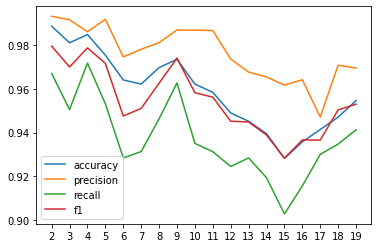

In [ ]:
list_range = range(2,20)
plt.xticks(list_range)
for metric in results:
  plt.plot(list_range,results[metric])
plt.legend(results.keys())


In [ ]:
model = KMeans(n_clusters=5, random_state=1)
preds = model.fit_predict(matrix.toarray())

In [ ]:
new_df = pd.DataFrame({'Text':feedbacks, 'Cluster':preds, 'Rating': df['Количество звезд']})

In [ ]:
new_df.Cluster.value_counts()

0    973
1    242
4    187
3    183
2    178
Name: Cluster, dtype: int64

In [ ]:
for cluster in set(new_df['Cluster']):
  print(f'Cluster {cluster}')
  print(new_df[new_df['Cluster'] == cluster]['Text'][:10])
  print('--'*10)

Cluster 0
1               Отличные весла, брал для детской лодки.
3                                           Все отлично
5                        Не понравился запах перчаток .
6                                       Быстро привезли
7     пахнет козами , недокожа !! но за эти деньги н...
8                                                👍👍👍👍👍👍
10                                        Агонь, всё ок
11    Данный тренажёр по описанию товара заявлен как...
12    Товар опаздал на 4 дня. Заказывали на подарок....
15                Где написать заявку на возврат товара
Name: Text, dtype: object
--------------------
Cluster 1
4     Вещь хорошая, регулировка есть, для начального...
14    Хороший утюжок,дочка и сын уже испробовали,гла...
19                  Отличное качество , прочные,хорошие
24                            Хорошие, сыну понравились
31                                        Хорошие замки
33                                    Хорошего качества
39                         Все супер.

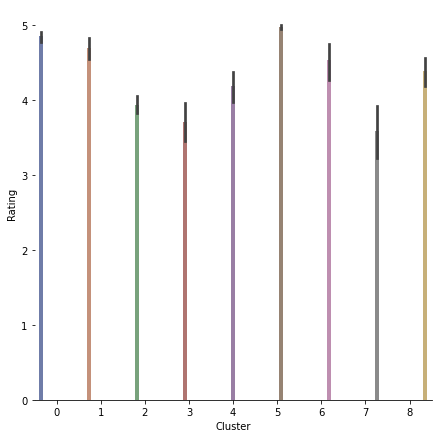

<Figure size 720x1152 with 0 Axes>

In [ ]:
g = sns.catplot(
    data=new_df, kind="bar",
    x="Cluster", y="Rating", hue="Cluster",
     palette="dark", alpha=.6, height=6
)
plt.figure(figsize=(10, 16))
g.despine(left=True)
g.set_axis_labels("Cluster", "Rating")

In [ ]:
for cluster in set(new_df['Cluster']):
  print('Cluster:', cluster)
  print('Mean Score:', np.mean(new_df[new_df['Cluster'] == cluster]['Rating']))
  for pair in get_top_n_words(new_df[new_df['Cluster'] == cluster]['Text'], n=10, ngram=2):
    print(pair)
  print('--'*10)

Cluster: 0
Mean Score: 4.851063829787234
('качество хороший', 29)
('хороший качество', 16)
('хороший ролик', 8)
('хороший гантель', 6)
('хороший эспандер', 6)
('хороший качественный', 5)
('пояс хороший', 4)
('хороший лото', 4)
('хороший чехол', 4)
('хороший удобный', 3)
--------------------
Cluster: 1
Mean Score: 4.696969696969697
('ребенок год', 37)
('год подходить', 8)
('подходить ребенок', 8)
('мальчик год', 8)
('ребенок довольный', 8)
('год отлично', 7)
('10 год', 6)
('брать ребенок', 6)
('довольный год', 5)
('покупать ребенок', 5)
--------------------
Cluster: 2
Mean Score: 3.9402560455192033
('свой деньги', 18)
('соответствовать описание', 15)
('цена качество', 9)
('процент выкуп', 8)
('деньги ветер', 8)
('первый тренировка', 7)
('поэтому возврат', 6)
('брать подарок', 6)
('сын довольный', 6)
('покупка довольный', 6)
--------------------
Cluster: 3
Mean Score: 3.7080745341614905
('приходить целый', 9)
('приходить весь', 6)
('приходить быстро', 5)
('приходить упаковывать', 5)
('пр